In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [0]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [0]:
data_features = df[feature_names]
data_target = df[target]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))


Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


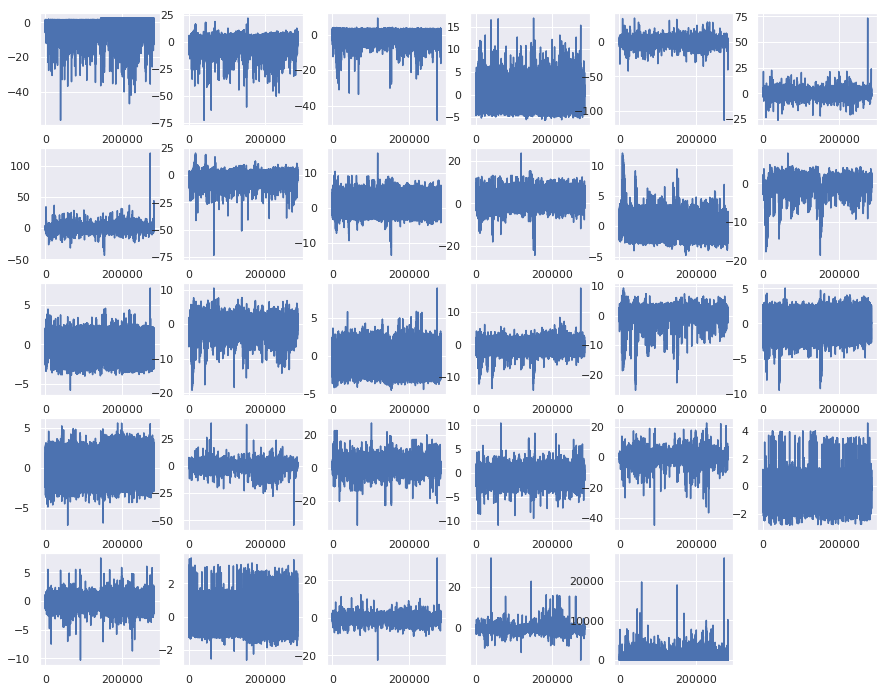

In [0]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


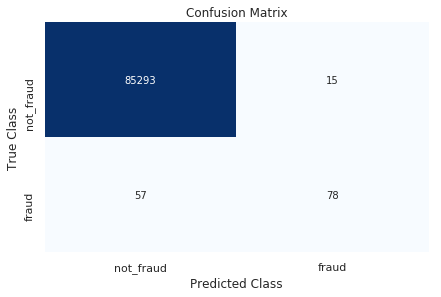

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
pred = model.predict(X_test)
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [0]:
#neural network
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 100, epochs = 4)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

Epoch 1/4
199364/199364 [==============================] - 4s 19us/step - loss: 0.0375 - acc: 0.9973
Epoch 2/4
199364/199364 [==============================] - 3s 14us/step - loss: 0.0070 - acc: 0.9984
Epoch 3/4
199364/199364 [==============================] - 3s 14us/step - loss: 0.0047 - acc: 0.9993
Epoch 4/4
85443/85443 [==============================] - 2s 22us/step


[0.00420882138564246, 0.9993679997191109]

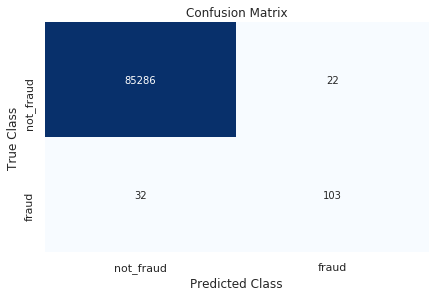

In [0]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [0]:

X = pd.read_csv('creditcard.csv', na_filter=True)

y_original = np.array(X['Class'], dtype='float')

X.drop(['Class'], inplace=True, axis=1)

rolling_window_size = 10  ### this selects how many historical transactions should be analyzed to judge the transaction at hand -- RNN width

X_interim = np.zeros([(X.shape[0]-rolling_window_size)*10,30])
y = []
for i in range((X.shape[0]-rolling_window_size)):
    beg = 0+i
    end = beg+rolling_window_size
    s = np.array(X[beg:end], dtype='float')
    X_interim[(rolling_window_size*i):(rolling_window_size*(i+1)),:] = s
    y.append(y_original[end])
 
y = np.array(y, dtype='float')
X_interim = X_interim[:,1::]
X_tensor = X_interim.reshape(int((np.shape(X_interim)[0]/rolling_window_size)), rolling_window_size, np.shape(X_interim)[1])

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from keras import regularizers

test_train_split = 0.7
stratify = True

if stratify:
    y = np.vstack((range(len(y)),y)).T
    y_pos = y[y[:,1]==1]
    y_neg = y[y[:,1]==0]
    
    y_pos = y_pos[np.random.choice(y_pos.shape[0], int(y_pos.shape[0]*test_train_split), replace=False),:]
    y_neg = y_neg[np.random.choice(y_neg.shape[0], int(y_neg.shape[0]*test_train_split), replace=False),:]
    
    train_idx = np.array(np.hstack((y_pos[:,0],y_neg[:,0])), dtype='int')
    
    X_train = X_tensor[train_idx, :, :]
    X_test = np.delete(X_tensor, train_idx, axis=0)
    y_train = y[train_idx,1]
    y_test = np.delete(y, train_idx, axis=0)
    y_test = y_test[:,1]
else: 
    train_idx = np.random.choice(X_tensor.shape[0], int(X_tensor.shape[0]*test_train_split), replace=False)
    X_train = X_tensor[train_idx, :, :]
    X_test = np.delete(X_tensor, train_idx, axis=0)
    y_train = y[train_idx]
    y_test = np.delete(y, train_idx, axis=0)

del (X_tensor, y, stratify, test_train_split, train_idx, y_neg, y_pos)


### Hyperparameters Tuning
# First test optimal epochs holding everything else constant
# Dropout: 0.1-0.6
# GradientClipping: 0.1-10
# BatchSize: 32,64,128,256,512 (power of 2)


### Train LSTM using Keras 2 API ###
model = Sequential()
model.add(LSTM(20, input_shape=X_train.shape[1:], kernel_initializer='lecun_uniform', activation='relu', kernel_regularizer=regularizers.l1(0.1), recurrent_regularizer=regularizers.l1(0.01), bias_regularizer=None, activity_regularizer=None, dropout=0.2, recurrent_dropout=0.2))#, return_sequences=True))
#model.add(LSTM(12, activation='relu', return_sequences=True))
#model.add(LSTM(8, activation='relu'))
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #optimizer='rmsprop'
print(model.summary())

model.fit(X_train, y_train, epochs=200, batch_size=1000, class_weight={0 : 1., 1: float(int(1/np.mean(y_train)))}, validation_split=0.3)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

### test AUC ###
from sklearn import metrics 

fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predict, pos_label=1)
print('TRAIN | AUC Score: ' + str((metrics.auc(fpr, tpr))))
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predict, pos_label=1)
print('TEST | AUC Score: ' + str((metrics.auc(fpr, tpr))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 20)                4000      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 21        
Total params: 4,021
Trainable params: 4,021
Non-trainable params: 0
_________________________________________________________________
None
Train on 139549 samples, validate on 59808 samples
Epoch 1/200
139549/139549 [==============================] - 9s 67us/step - loss: 39.5838 - acc: 0.7911 - val_loss: 22.4689 - val_acc: 0.8373
Epoch 2/200
139549/139549 [==============================] - 6s 41us/step - loss: 26.6329 - acc: 0.5651 - val_loss: 16.8580 - val_acc: 0.4748
Epoch 3/200
139549/139549 [==============================] - 6s 41us/step - loss: 19.0537 - acc: 0.4208 - val_loss: 14.7191 - val_acc: 0.3893
Epoch 4/200
139549/139549 [===========================

In [0]:
# import packages
# matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

#set random seed and percentage of test data
RANDOM_SEED = 314 #used to help randomly select the data points
TEST_PCT = 0.2 # 20% of the data

df = pd.read_csv("creditcard.csv") #unzip and read in data downloaded to the local directory
df.head(n=5) #just to check you imported the dataset properly
df.isnull().values.any()
df_norm = df
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))
train_x, test_x = train_test_split(df_norm, test_size=TEST_PCT, random_state=RANDOM_SEED)
print("TRAIN SIZE :",len(train_x))

print("TEST SIZE :",len(test_x)
)
train_x = train_x[train_x.Class == 0] #where normal transactions
train_x = train_x.drop(['Class'], axis=1) #drop the class column


test_y = test_x['Class'] #save the class column for the test set
test_x = test_x.drop(['Class'], axis=1) #drop the class column

train_x = train_x.values #transform to ndarray
test_x = test_x.values
nb_epoch = 100
batch_size = 128
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, tb]).history
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()


TRAIN SIZE : 227845
TEST SIZE : 56962
Train on 227468 samples, validate on 56962 samples
Epoch 1/100
227468/227468 [==============================] - 4s 17us/step - loss: 0.8606 - acc: 0.4918 - val_loss: 0.8294 - val_acc: 0.5726
Epoch 2/100
227468/227468 [==============================] - 3s 14us/step - loss: 0.7726 - acc: 0.6010 - val_loss: 0.7917 - val_acc: 0.6201
Epoch 3/100
227468/227468 [==============================] - 3s 14us/step - loss: 0.7496 - acc: 0.6276 - val_loss: 0.7767 - val_acc: 0.6402
Epoch 4/100
227468/227468 [==============================] - 3s 14us/step - loss: 0.7388 - acc: 0.6474 - val_loss: 0.7678 - val_acc: 0.6574
Epoch 5/100
227468/227468 [==============================] - 3s 14us/step - loss: 0.7308 - acc: 0.6621 - val_loss: 0.7606 - val_acc: 0.6699
Epoch 6/100
185728/227468 [=======================>......] - ETA: 0s - loss: 0.7213 - acc: 0.6713

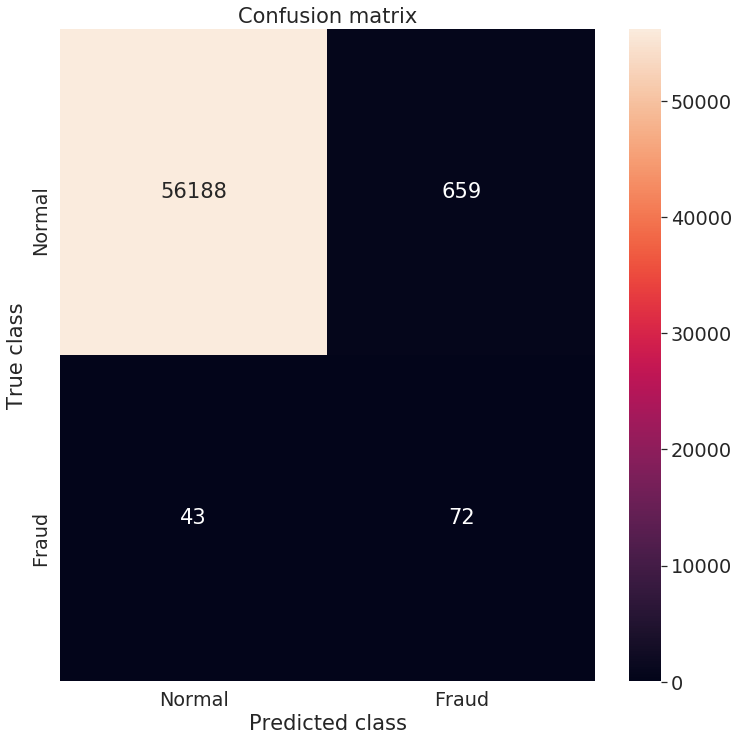

In [0]:
pred_y = [1 if e > 5 else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()